In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from wordcloud import WordCloud
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("zomato_eda.csv")

In [3]:
data.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
data.city.nunique()
data.city.unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

In [5]:
data[data["city"]=="Mumbai"]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
134852,18562340,Drinkery 51,['Casual Dining'],https://www.zomato.com/mumbai/drinkery-51-band...,"1st Floor, Vibgyor Towers, Bandra Kurla Comple...",Mumbai,3,Bandra Kurla Complex,19.067176,72.867493,...,4,Rs.,"['Dinner', 'Debit Card', 'Lunch', 'Serves Alco...",4.4,Very Good,3796,1897,0.0,1,-1
134853,34757,Joey's Pizza,['Quick Bites'],https://www.zomato.com/mumbai/joeys-pizza-mala...,"Shop 1, Plot D, Samruddhi Complex, Chincholi B...",Mumbai,3,Malad West,19.178188,72.834666,...,2,Rs.,"['Lunch', 'Cash', 'Takeaway Available', 'Debit...",4.5,Excellent,7932,4960,0.0,-1,-1
134854,18548172,Hitchki,['Bar'],https://www.zomato.com/mumbai/hitchki-powai?ut...,"5, Transocean, Hiranandani Business Park, Lake...",Mumbai,3,Powai,19.119930,72.907331,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.7,Excellent,3762,12979,0.0,1,-1
134855,18392725,Tamasha,['Lounge'],https://www.zomato.com/mumbai/tamasha-lower-pa...,"Ground Floor, Victoria House, E.B Marg, Lower ...",Mumbai,3,Lower Parel,19.006060,72.827496,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Cred...",4.7,Excellent,4979,16595,0.0,-1,-1
134856,18962112,Bayroute,['Fine Dining'],https://www.zomato.com/mumbai/bayroute-juhu?ut...,"14, Silver Beach Estate, A.B. Nair Road, Oppos...",Mumbai,3,Juhu,19.110684,72.825368,...,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.9,Excellent,706,2484,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142348,46792,BOX8- Desi Meals,[],https://www.zomato.com/mumbai/box8-desi-meals-...,"102, Bhavani Industrial Estate, Opposite IIT B...",Mumbai,3,Powai,19.124284,72.914877,...,1,Rs.,"['Cash', 'Debit Card', 'Takeaway Available', '...",4.0,Very Good,726,703,0.0,1,-1
142349,37750,Faasos,['Quick Bites'],https://www.zomato.com/mumbai/faasos-veera-des...,"Shop 06, Building 2, Pramukh Park Rehab CHS Li...",Mumbai,3,Veera Desai Area,19.139601,72.833119,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",3.9,Good,510,251,0.0,1,-1
142350,18165909,Charcoal Eats Express,['Quick Bites'],https://www.zomato.com/mumbai/charcoal-eats-ex...,"Opposite Kamala Mills, Lower Parel, Mumbai",Mumbai,3,Lower Parel,19.002537,72.829391,...,2,Rs.,"['Lunch', 'Cash', 'Credit Card', 'Dinner', 'St...",4.0,Very Good,491,344,0.0,-1,-1
142351,18306481,Wok Express,['Food Court'],https://www.zomato.com/mumbai/wok-express-1-an...,"Food Court, 2nd Floor, Infinity Mall, Unit 215...",Mumbai,3,"Infiniti Mall, Andheri Lokhandwala, Andheri West",19.141117,72.831181,...,2,Rs.,"['No Alcohol Available', 'Dinner', 'Mall Parki...",3.7,Good,515,490,0.0,-1,-1


In [6]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [7]:
data.drop_duplicates(["res_id"],keep='first',inplace=True)
data.shape

(55568, 26)

In [8]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,5.556800e+04,55568.000000,55568.000000,55568.000000,55568.0,55568.000000,55568.000000,55568.000000,55568.000000,55568.000000,55556.0,55568.000000,55568.0
mean,1.313694e+07,3409.499298,21.450847,76.497131,1.0,528.205874,1.714728,2.958593,223.330352,160.974770,0.0,-0.349824,-1.0
std,8.105959e+06,5174.942737,42.901135,10.982976,0.0,595.028447,0.878227,1.464576,618.224019,586.975382,0.0,0.933794,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.001352e+06,8.000000,16.518374,74.645885,1.0,200.000000,1.000000,2.900000,6.000000,1.000000,0.0,-1.000000,-1.0
50%,1.869268e+07,26.000000,22.468629,77.106348,1.0,350.000000,1.000000,3.500000,35.000000,10.000000,0.0,-1.000000,-1.0
75%,1.887262e+07,11294.000000,26.752959,79.831641,1.0,600.000000,2.000000,3.900000,175.000000,69.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [9]:
missing_data = data.isnull().sum()
print(missing_data)
# Impute missing values in the 'address' column with a placeholder (e.g., "Unknown")
data['address'].fillna("Unknown", inplace=True)

# Impute missing values in the 'timings' column with a placeholder (e.g., "Not available")
data['timings'].fillna("Not available", inplace=True)

# Impute missing values in the 'opentable_support' column with a default value (e.g., 0)
data['opentable_support'].fillna(0, inplace=True)
print(missing_data)

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64
res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                    

In [10]:
# Removing [' '] from each value
print(data["establishment"].unique()[0])
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2])
print(data["establishment"].unique()[0])

# Changing ''  to 'NA'
print(data["establishment"].unique())
data["establishment"] = data["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(data["establishment"].unique())

['Quick Bites']
Quick Bites
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


In [11]:
data[data["average_cost_for_two"]==30000]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
136240,38489,Ocean - The Private Dining Room - Sahara Star,Fine Dining,https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,...,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1


In [12]:
print(data["cuisines"].nunique())
print(data["cuisines"].unique())

9382
['North Indian, South Indian, Mithai, Street Food, Desserts'
 'North Indian, Mughlai, Rolls, Chinese, Fast Food, Street Food'
 'Fast Food, Mithai' ...
 'Street Food, Biryani, Chinese, Fast Food, North Indian, Mughlai'
 'North Indian, Chinese, Mexican, Italian, Thai, Continental'
 'North Indian, Lucknowi, Chinese']


In [13]:
data["cuisines"] = data["cuisines"].fillna("No cuisine")

In [14]:
print(data["timings"].nunique())
print(data["timings"].unique())
print(data["highlights"].nunique())
print(data["highlights"].unique())

7741
['8:30am – 10:30pm (Mon-Sun)'
 '12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat, Sun), 1PM to 12Midnight (Tue)'
 '9:30 AM to 11 PM' ... '8am – 2:30pm, 5pm – 10pm (Mon-Sun)'
 '8am – 3pm, 6:30pm – 11pm (Mon-Sun)'
 '4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm – 11:30pm (Thu)']
31228
["['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"
 "['Delivery', 'No Alcohol Available', 'Dinner', 'Takeaway Available', 'Lunch', 'Cash', 'Indoor Seating']"
 "['No Alcohol Available', 'Dinner', 'Takeaway Available', 'Breakfast', 'Lunch', 'Cash', 'Delivery', 'Outdoor Seating', 'Air Conditioned', 'Self Service', 'Indoor Seating', 'Digital Payments Accepted', 'Pure Veg', 'Desserts and Bakes']"
 ...
 "['Dinner', 'Delivery', 'Cash', 'Takeaway Available', 'Free Parking', 'Digital Payments Accepted', 'Pure Veg', 'Indoor Seating']"
 "['Dinner', 'Cash', 'Takeaway Available', 'Lunch', 'Delivery', 'Free Parking', 'Indoor Seating', 'Air Conditioned'

In [15]:
data[["aggregate_rating","votes","photo_count"]].describe().loc[["mean","min","max"]]

,aggregate_rating,votes,photo_count
mean,2.958593,223.330352,160.97477
min,0.000000,-18.000000,0.00000
max,4.900000,42539.000000,17702.00000


In [16]:
outlets = data["name"].value_counts()
outlets

name
Domino's Pizza                           399
Cafe Coffee Day                          315
KFC                                      204
Baskin Robbins                           202
Keventers                                189
                                        ... 
Boulevard 69                               1
7-Eleven Restaurant                        1
Food station                               1
Silver Saloon - Taj Usha Kiran Palace      1
Geeta lodge                                1
Name: count, Length: 41100, dtype: int64

In [17]:
chains = outlets[outlets >= 2]
single = outlets[outlets == 1]

In [18]:
print("Total Restaurants = ", data.shape[0])
print("Total Restaurants that are part of some chain = ", data.shape[0] - single.shape[0])
print("Percentage of Restaurants that are part of a chain = ", np.round((data.shape[0] - single.shape[0]) / data.shape[0],2)*100, "%")

Total Restaurants =  55568
Total Restaurants that are part of some chain =  19358
Percentage of Restaurants that are part of a chain =  35.0 %


In [19]:
top10_chains = data["name"].value_counts()[:10].sort_values(ascending=True)

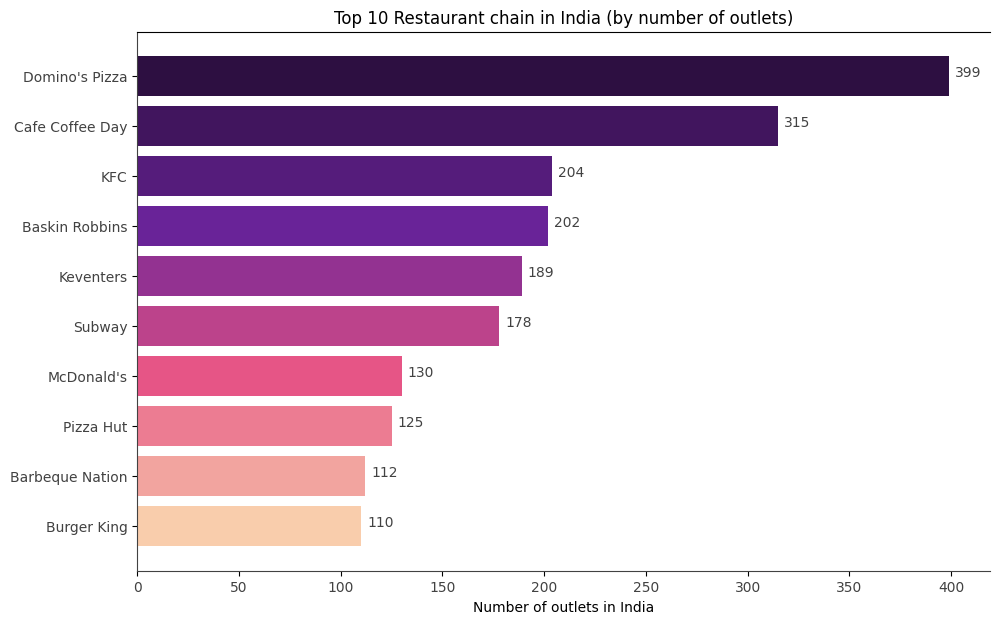

In [20]:
height = top10_chains.values
bars = top10_chains.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291","#692398","#551c7b","#41155e","#2d0f41"]
plt.barh(y_pos, height, color=colors)

plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v+3, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by number of outlets)")


plt.show()

In [21]:
outlets = data["name"].value_counts()
atleast_5_outlets = outlets[outlets > 4]

In [22]:
data['aggregate_rating'] = pd.to_numeric(data['aggregate_rating'], errors='coerce')
data.dropna(subset=['aggregate_rating'], inplace=True)
print(data['aggregate_rating'].unique())

[4.4 4.2 4.3 4.9 4.  3.8 3.4 4.1 3.5 4.6 3.9 3.6 4.5 4.7 3.7 4.8 3.2 0.
 3.3 2.8 3.1 2.6 3.  2.7 2.9 2.2 2.3 2.4 2.5 2.1 1.8 2.  1.9]


In [23]:
top10_chains2 = data[data["name"].isin(atleast_5_outlets.index)].groupby("name")["aggregate_rating"].mean().sort_values(ascending=False)[:10].sort_values(ascending=True)

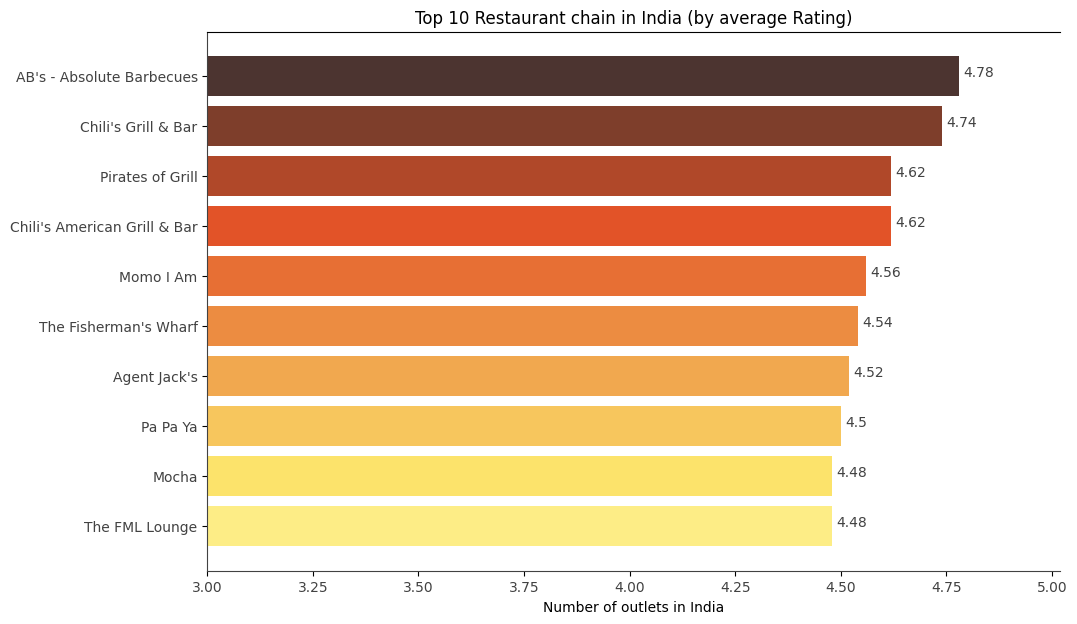

In [24]:
height = pd.Series(top10_chains2.values).map(lambda x : np.round(x, 2))
bars = top10_chains2.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#fded86', '#fce36b', '#f7c65d', '#f1a84f', '#ec8c41', '#e76f34', '#e25328', '#b04829', '#7e3e2b', '#4c3430']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets in India")

for i, v in enumerate(height):
    ax.text(v + 0.01, i, str(v), color='#424242')
plt.title("Top 10 Restaurant chain in India (by average Rating)")

plt.show()

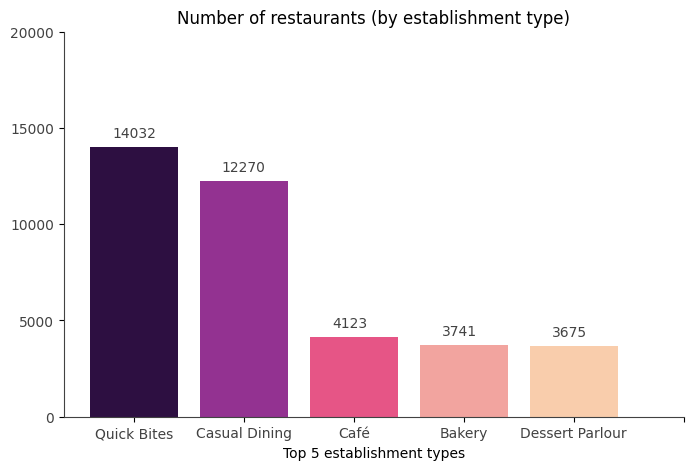

In [25]:
est_count = data.groupby("establishment").count()["res_id"].sort_values(ascending=False)[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#e65586","#f2a49f","#f9cdac"]
plt.bar(est_count.index, est_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 25000, 5000), color="#424242")
plt.xlabel("Top 5 establishment types")

for i, v in enumerate(est_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by establishment type)")


plt.show()

In [26]:
# Convert "aggregate_rating" to numeric, handling non-numeric values by coercing them to NaN
data['aggregate_rating'] = pd.to_numeric(data['aggregate_rating'], errors='coerce')

# Drop rows with missing values in the "aggregate_rating" column
data.dropna(subset=['aggregate_rating'], inplace=True)

# Group by "establishment" and calculate the mean of "aggregate_rating"
rating_by_est = data.groupby("establishment")["aggregate_rating"].mean()

# Sort the results in descending order and get the top 10
top_10_rating_by_est = rating_by_est.sort_values(ascending=False).head(10)

# Print or use the top 10 results as needed
print(top_10_rating_by_est)

establishment
Microbrewery     4.268182
Pub              3.758263
Cocktail Bar     3.531250
Fine Dining      3.436547
Lounge           3.436463
Club             3.378571
Irani Cafe       3.321429
Casual Dining    3.238680
Café             3.212345
Butcher Shop     3.110390
Name: aggregate_rating, dtype: float64


In [27]:
# Convert "votes" to numeric, handling non-numeric values by coercing them to NaN
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')

# Drop rows with missing values in the "votes" column
data.dropna(subset=['votes'], inplace=True)

# Group by "establishment" and calculate the mean of "votes"
mean_votes_by_establishment = data.groupby("establishment")["votes"].mean()

# Sort the results in descending order and get the top 10
top_10_votes_by_est = mean_votes_by_establishment.sort_values(ascending=False).head(10)

# Print or use the top 10 results as needed
print(top_10_votes_by_est)


establishment
Microbrewery     1992.300000
Pub               880.274510
Bar               500.613295
Lounge            494.509756
Casual Dining     396.339935
Cocktail Bar      309.625000
Club              300.544643
Fine Dining       293.126384
Café              276.558574
Irani Cafe        178.714286
Name: votes, dtype: float64


In [28]:
# Convert "photo_count" to numeric, handling non-numeric values by coercing them to NaN
data['photo_count'] = pd.to_numeric(data['photo_count'], errors='coerce')

# Drop rows with missing values in the "photo_count" column
data.dropna(subset=['photo_count'], inplace=True)

# Group by "establishment" and calculate the mean of "photo_count"
mean_photo_count_by_establishment = data.groupby("establishment")["photo_count"].mean()

# Sort the results in descending order and get the top 10
top_10_photo_count_by_est = mean_photo_count_by_establishment.sort_values(ascending=False).head(10)

# Print or use the top 10 results as needed
print(top_10_photo_count_by_est)

establishment
Microbrewery     2042.054545
Pub               652.955182
Cocktail Bar      555.625000
Lounge            514.687805
Bar               513.321658
Fine Dining       364.817590
Café              331.935969
Casual Dining     291.550448
Irani Cafe        173.000000
Club              107.089286
Name: photo_count, dtype: float64


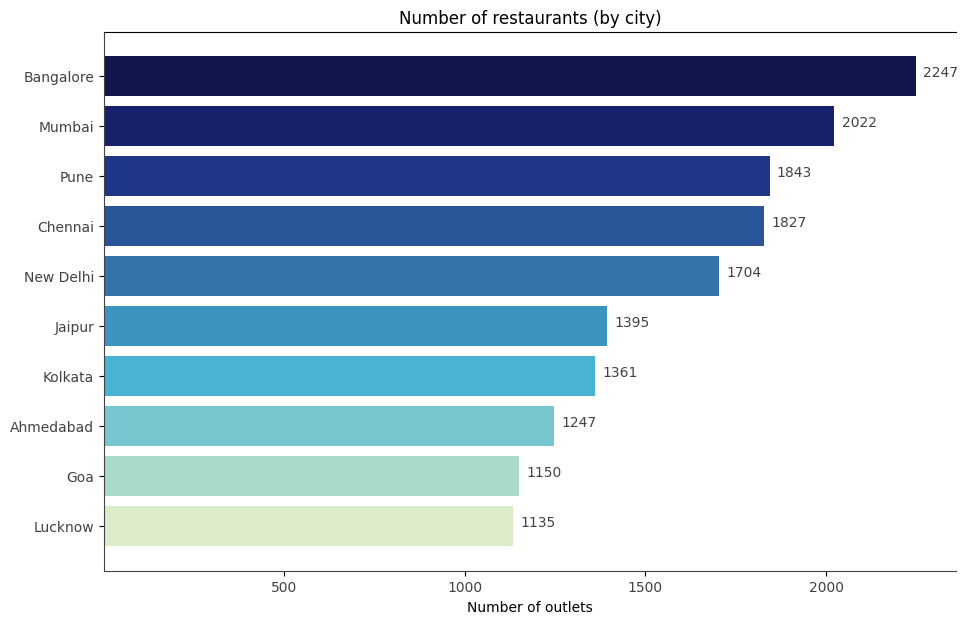

In [29]:
city_counts = data.groupby("city").count()["res_id"].sort_values(ascending=True)[-10:]

height = pd.Series(city_counts.values)
bars = city_counts.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686', '#18216b', '#11174b']
plt.barh(y_pos, height, color=colors)

plt.xlim(3)
plt.xticks(color="#424242")
plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Number of outlets")

for i, v in enumerate(height):
    ax.text(v + 20, i, str(v), color='#424242')
plt.title("Number of restaurants (by city)")


plt.show()

Total number of unique cuisines =  134


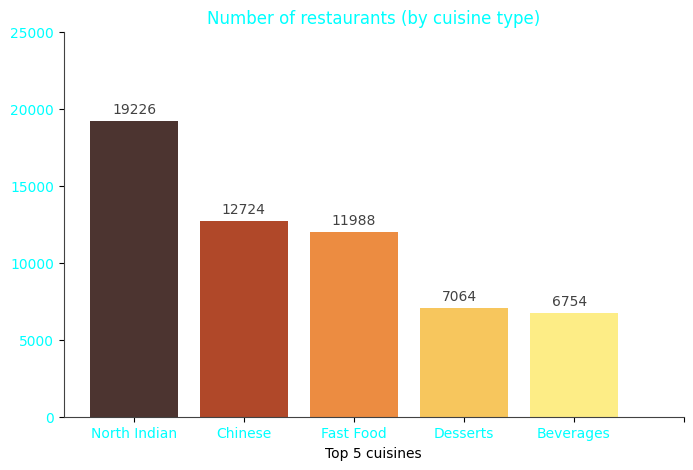

In [30]:
cuisines = []
data["cuisines"].apply(lambda x : cuisines.extend(x.split(", ")))
cuisines = pd.Series(cuisines)
print("Total number of unique cuisines = ", cuisines.nunique())
c_count = cuisines.value_counts()[:5]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#4c3430', '#b04829', '#ec8c41', '#f7c65d','#fded86']
plt.bar(c_count.index, c_count.values, color=colors)

plt.xticks(range(0, 6), color="aqua")
plt.yticks(range(0, 30000, 5000), color="aqua")
plt.xlabel("Top 5 cuisines",)

for i, v in enumerate(c_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by cuisine type)",color='aqua')


plt.show()


In [31]:
data["cuisines2"] = data['cuisines'].apply(lambda x : x.split(", "))

cuisines_list = cuisines.unique().tolist()
zeros = np.zeros(shape=(len(cuisines_list),2))
c_and_r = pd.DataFrame(zeros, index=cuisines_list, columns=["Sum","Total"])

In [32]:
for i, x in data.iterrows():
    for j in x["cuisines2"]:
        c_and_r.loc[j]["Sum"] += x["aggregate_rating"]
        c_and_r.loc[j]["Total"] += 1

In [33]:
c_and_r["Mean"] = c_and_r["Sum"] / c_and_r["Total"]
c_and_r

,Sum,Total,Mean
North Indian,60055.2,19226.0,3.123645
South Indian,18635.3,6381.0,2.920436
Mithai,8545.7,3144.0,2.718098
Street Food,10794.6,3715.0,2.905680
Desserts,22723.9,7064.0,3.216860
...,...,...,...
Swedish,3.6,1.0,3.600000
Cake,6.4,2.0,3.200000
Garhwali,3.3,2.0,1.650000
Vegan,3.5,1.0,3.500000


In [34]:
c_and_r[["Mean","Total"]].sort_values(by="Mean", ascending=False)[:10]

,Mean,Total
Egyptian,4.416667,6.0
Poké,4.350000,12.0
Fusion,4.350000,2.0
International,4.300000,1.0
Tex-Mex,4.293939,33.0
Singaporean,4.287500,16.0
Moroccan,4.258333,12.0
Sushi,4.206087,115.0
Greek,4.159091,22.0
Mediterranean,4.130275,327.0


In [35]:
hl = []
data["highlights"].apply(lambda x : hl.extend(x[2:-2].split("', '")))
hl = pd.Series(hl)
print("Total number of unique highlights = ", hl.nunique())

Total number of unique highlights =  104


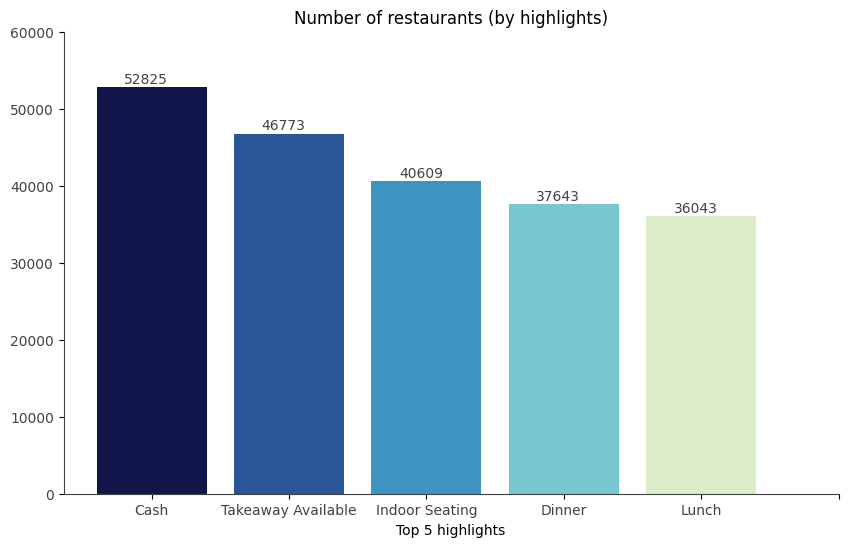

In [36]:
h_count = hl.value_counts()[:5]

fig = plt.figure(figsize=[10,6], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ['#11174b', '#2a5599', '#3e94c0', '#78c6d0', '#dcecc9']
plt.bar(h_count.index, h_count.values, color=colors)

plt.xticks(range(0, 6), color="#424242")
plt.yticks(range(0, 70000, 10000), color="#424242")
plt.xlabel("Top 5 highlights")

for i, v in enumerate(h_count):
    ax.text(i-0.2, v+500, str(v), color='#424242')
plt.title("Number of restaurants (by highlights)")


plt.show()

In [37]:
data["highlights"][0]

"['Lunch', 'Takeaway Available', 'Credit Card', 'Dinner', 'Cash', 'Air Conditioned', 'Indoor Seating', 'Pure Veg']"

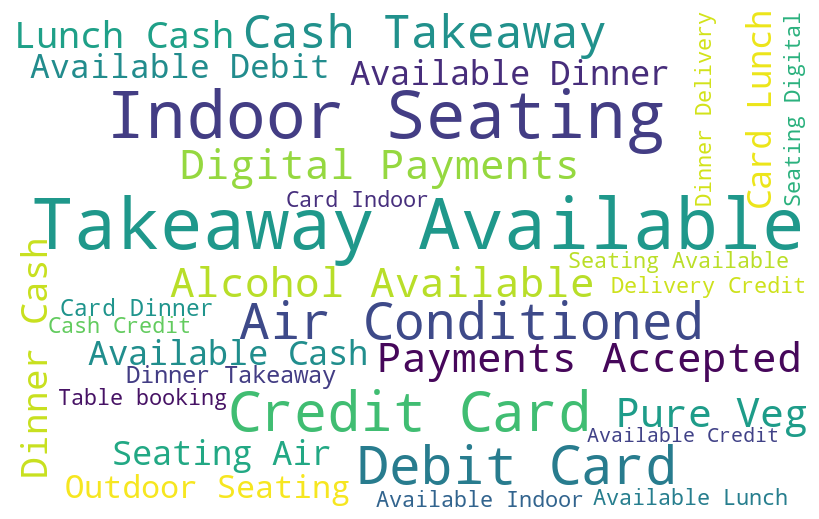

In [38]:
hl_str = ""
for i in hl:
    hl_str += str(i) + " "
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                min_font_size = 10, max_words=30).generate(hl_str)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

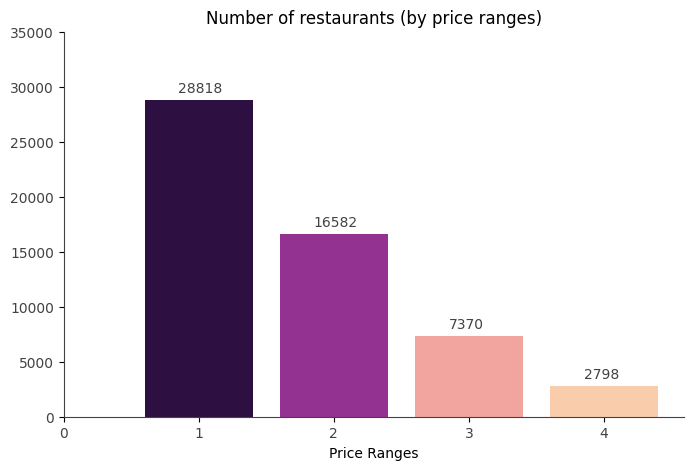

In [39]:
pr_count = data.groupby("price_range").count()["name"]

fig = plt.figure(figsize=[8,5], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray","yellow","purple","violet","orange","red","maroon"]
#random.shuffle(colors)
colors = ["#2d0f41",'#933291',"#f2a49f","#f9cdac"]
plt.bar(pr_count.index, pr_count.values, color=colors)

plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")

for i, v in enumerate(pr_count):
    ax.text(i+0.85, v+700, str(v), color='#424242')
plt.title("Number of restaurants (by price ranges)")


plt.show()

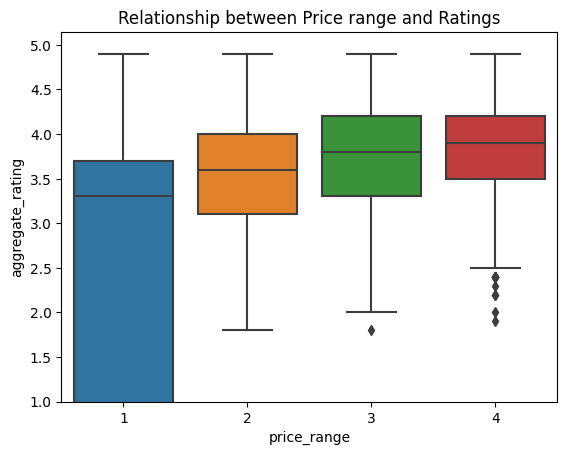

In [40]:
sns.boxplot(x='price_range', y='aggregate_rating', data=data)
plt.ylim(1)
plt.title("Relationship between Price range and Ratings")
plt.show()

In [41]:
def Encode(data):
    for column in data.columns[~data.columns.isin(['rating text', 'cost', 'votes'])]:
        # Check if the column contains lists
        if isinstance(data[column].iloc[0], list):
            # Convert lists to strings and then factorize
            data[column] = data[column].astype(str).factorize()[0]
        else:
            # Factorize non-list columns
            data[column] = data[column].factorize()[0]
    return data

zomato_en = Encode(data.copy())


Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway', 'cuisines2'],
      dtype='object')

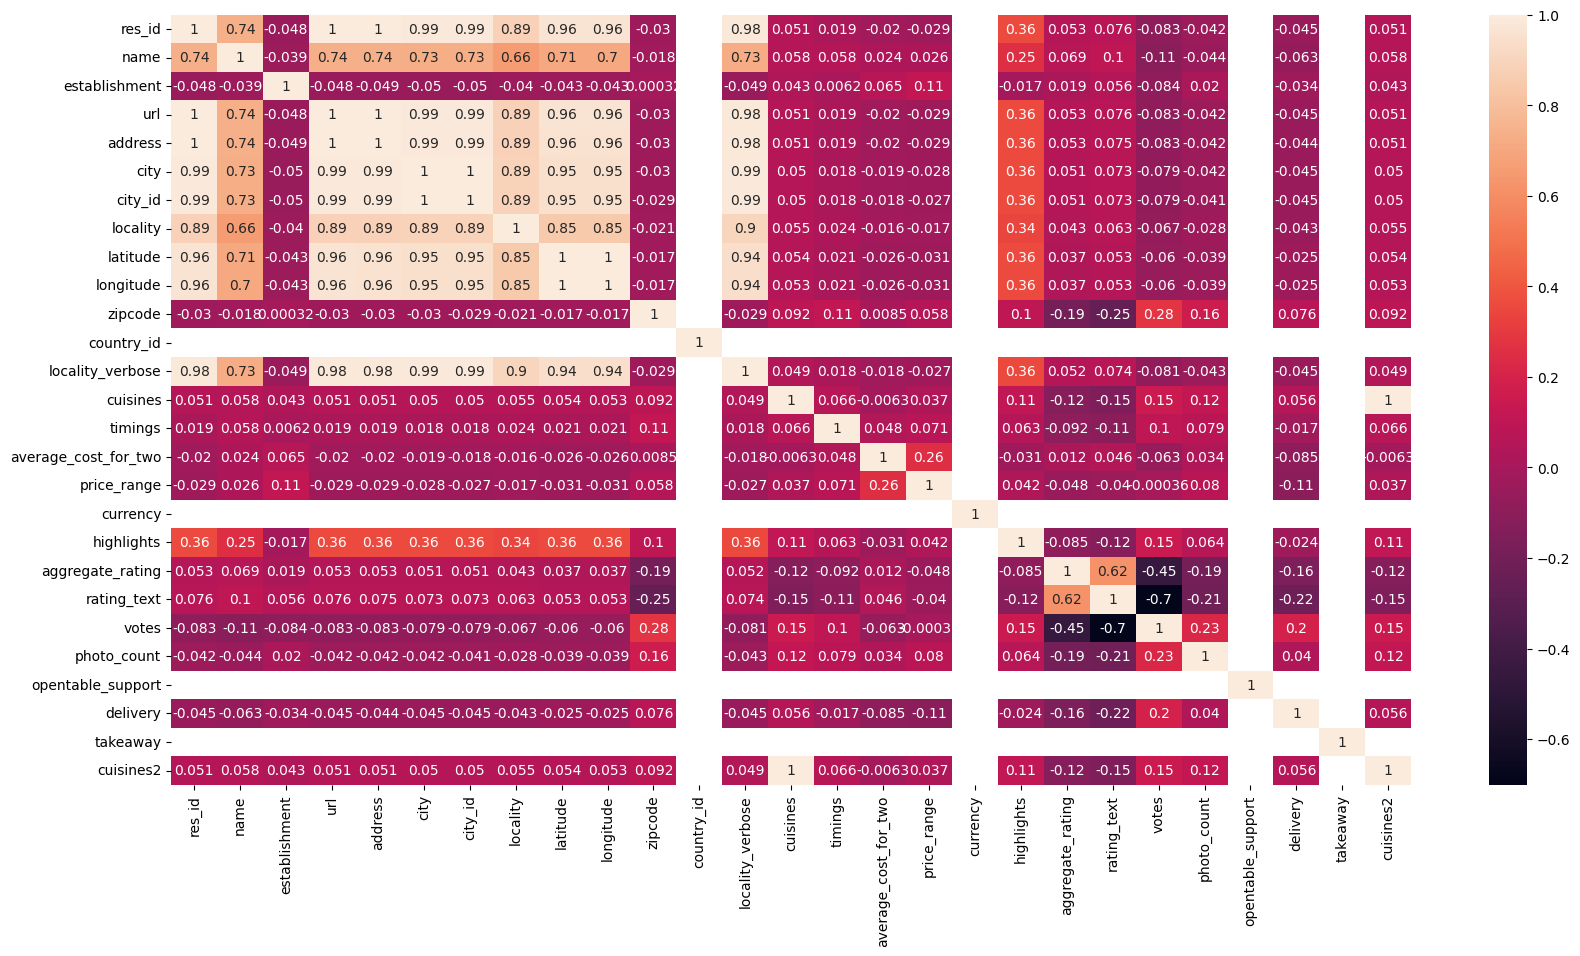

In [42]:
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
zomato_en.columns

In [43]:
print(zomato_en.columns)
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rating_text']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway', 'cuisines2'],
      dtype='object')


99237     2
20620     0
97953     4
132567    2
71713     4
Name: rating_text, dtype: int64

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select features and target variable
features = ['locality', 'price_range', 'votes']
X = zomato_en[features]
y = zomato_en['rating_text']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.6854417851358646


In [45]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def Encode(data):
    # Make a copy of the original data to avoid modifying the input
    encoded_data = data.copy()

    # Label encode 'city', 'locality', and 'rating_text' columns
    label_encoder = LabelEncoder()
    encoded_data['city'] = label_encoder.fit_transform(encoded_data['city'])
    encoded_data['locality'] = label_encoder.fit_transform(encoded_data['locality'])
    encoded_data['rating_text'] = label_encoder.fit_transform(encoded_data['rating_text'])

    return encoded_data

# Apply the modified Encode function to your data
zomato_en = Encode(data.copy())


In [46]:
#Defining the independent variables and dependent variables
x = zomato_en.iloc[:,[5,7,20]]
y = zomato_en['aggregate_rating']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()

99237     3.9
20620     4.3
97953     0.0
132567    3.7
71713     0.0
Name: aggregate_rating, dtype: float64

In [1]:
#Prepare a Linear REgression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

NameError: name 'LinearRegression' is not defined

In [1]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

NameError: name 'train_test_split' is not defined

In [142]:
print(x_train.isnull().sum())

city           0
locality       0
rating_text    0
dtype: int64


In [143]:
x_train.fillna(0, inplace=True)
x_test.fillna(0, inplace=True)

In [144]:
print(x_train.isnull().sum())

city           0
locality       0
rating_text    0
dtype: int64


In [169]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9870475823432419

In [170]:
# Confirm the number of features and their order in the input data
print("Number of features in training data:", x_train.shape[1])
print("Number of features in input data:", encoded_input.shape[1])

# Check if the order of features is consistent
print("Order of features in training data:", list(x_train.columns))
print("Order of features in input data:", list(encoded_input.columns))

# Check data types
print("Data types in training data:", x_train.dtypes)
print("Data types in input data:", encoded_input.dtypes)


Number of features in training data: 3
Number of features in input data: 4
Order of features in training data: ['city', 'locality', 'rating_text']
Order of features in input data: ['city', 'locality', 'rating_text', 'original_rating_text']
Data types in training data: city           int32
locality       int32
rating_text    int32
dtype: object
Data types in input data: city                     int32
locality                 int32
rating_text              int32
original_rating_text    object
dtype: object


In [171]:
# Check for NaN values in the encoded input data
print("NaN values in encoded_input:", encoded_input.isnull().sum())

# If there are any NaN values, print the rows where NaN values occur
print("Rows with NaN values in encoded_input:")
print(encoded_input[encoded_input.isnull().any(axis=1)])


NaN values in encoded_input: city                    0
locality                0
rating_text             0
original_rating_text    0
dtype: int64
Rows with NaN values in encoded_input:
Empty DataFrame
Columns: [city, locality, rating_text, original_rating_text]
Index: []


In [172]:
# Get feature importances from the model
feature_importances = RForest.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(x_train.columns, feature_importances))

# Print feature importances
print("Feature Importances:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")




Feature Importances:
city: 0.0009962194305772377
locality: 0.0017303261370434425
rating_text: 0.9972734544323794


In [173]:
input_data = pd.DataFrame({'city': ['Mumbai'], 'locality': ['Khandari'], 'rating_text': ['Excellent']})

# Encode the input data using the same encoding logic as in your training code
encoded_input = Encode(input_data)
prediction = RForest.predict(encoded_input)
print(prediction)

[3.03794023]


In [175]:
input_data = pd.DataFrame({'city': ['Mumbai'], 'locality': ['Lower Parel'], 'rating_text': ['Good']})

# Encode the input data using the same encoding logic as in your training code
encoded_input = Encode(input_data)
prediction = RForest.predict(encoded_input)
print(prediction)

[3.03794023]


In [1]:
import pickle
# Save the trained model using pickle
with open('RForest.pkl', 'wb') as model_file:
    pickle.dump(RForest, model_file)


NameError: name 'RForest' is not defined

In [73]:
print(data.columns)

Index(['res_id', 'name', 'establishment', 'url', 'address', 'city', 'city_id',
       'locality', 'latitude', 'longitude', 'zipcode', 'country_id',
       'locality_verbose', 'cuisines', 'timings', 'average_cost_for_two',
       'price_range', 'currency', 'highlights', 'aggregate_rating',
       'rating_text', 'votes', 'photo_count', 'opentable_support', 'delivery',
       'takeaway', 'cuisines2'],
      dtype='object')


In [26]:
import pandas as pd
data = pd.read_csv("zomato_eda.csv")

In [27]:
columns_to_drop = ['res_id','name','url', 'address', 'city_id', 'zipcode', 'country_id', 'timings', 'currency', 'highlights','latitude', 'longitude','locality','city','photo_count', 'opentable_support']
data = data.drop(columns=columns_to_drop)

# You can also aggregate 'delivery' and 'takeaway' into a single column 'service_type'
data['service_type'] = data['delivery'] + data['takeaway']
data = data.drop(columns=['delivery', 'takeaway'])

# Drop rows with missing values
data = data.dropna()

# Ensure the changes are reflect
data.head()

,establishment,locality_verbose,cuisines,average_cost_for_two,price_range,aggregate_rating,rating_text,votes,service_type
0,['Quick Bites'],"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",700,2,4.4,Very Good,814,-2
1,['Quick Bites'],"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,4.4,Very Good,1203,-2
2,['Quick Bites'],"Shahganj, Agra","Fast Food, Mithai",300,1,4.2,Very Good,801,0
3,['Quick Bites'],"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",300,1,4.3,Very Good,693,0
4,['Casual Dining'],"Tajganj, Agra","North Indian, Continental, Italian",1000,3,4.9,Excellent,470,0


In [29]:
data[rating_text].unique()

NameError: name 'rating_text' is not defined

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210553 entries, 0 to 211943
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   establishment         210553 non-null  object 
 1   locality_verbose      210553 non-null  object 
 2   cuisines              210553 non-null  object 
 3   average_cost_for_two  210553 non-null  int64  
 4   price_range           210553 non-null  int64  
 5   aggregate_rating      210553 non-null  float64
 6   rating_text           210553 non-null  object 
 7   votes                 210553 non-null  int64  
 8   service_type          210553 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 16.1+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data.rating_text[data.rating_text == 'Yes'] = 1 
data.rating_text[data.rating_text == 'No'] = 0
data.rating_text[data.rating_text == 'No'] = 0

In [7]:
data.establishment = le.fit_transform(data.establishment)
data.locality_verbose = le.fit_transform(data.locality_verbose)
data.cuisines = le.fit_transform(data.cuisines)
#data.rating_text = le.fit_transform(data.rating_text)

In [8]:
data.head()

,establishment,locality_verbose,cuisines,average_cost_for_two,price_range,aggregate_rating,rating_text,votes,service_type
0,23,1764,7897,700,2,4.4,32,814,-2
1,23,74,7619,600,2,4.4,32,1203,-2
2,23,3149,4334,300,1,4.2,32,801,0
3,23,600,3826,300,1,4.3,32,693,0
4,6,3386,7039,1000,3,4.9,11,470,0


In [9]:
my_data=data.iloc[:,[1,3,4,6,7,8]]
my_data.to_csv('Zomato_df.csv') 

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210553 entries, 0 to 211943
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   establishment         210553 non-null  int32  
 1   locality_verbose      210553 non-null  int32  
 2   cuisines              210553 non-null  int32  
 3   average_cost_for_two  210553 non-null  int64  
 4   price_range           210553 non-null  int64  
 5   aggregate_rating      210553 non-null  float64
 6   rating_text           210553 non-null  int32  
 7   votes                 210553 non-null  int64  
 8   service_type          210553 non-null  int64  
dtypes: float64(1), int32(4), int64(4)
memory usage: 12.9 MB


In [11]:
x = data.iloc[:,[1,4,6,7,8]]
x.head()

,locality_verbose,price_range,rating_text,votes,service_type
0,1764,2,32,814,-2
1,74,2,32,1203,-2
2,3149,1,32,801,0
3,600,1,32,693,0
4,3386,3,11,470,0


In [12]:
y = data['average_cost_for_two']
y

0          700
1          600
2          300
3          300
4         1000
          ... 
211939     600
211940     300
211941     700
211942     500
211943     600
Name: average_cost_for_two, Length: 210553, dtype: int64

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare a Linear Regression Model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Make predictions
y_pred = reg.predict(x_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')

R-squared score: 0.6354201933499527


In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from sklearn.metrics import r2_score
import xgboost as xgb

# Convert data into DMatrix format, which is required by XGBoost
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

# Define parameters for XGBoost regression
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',             # Root Mean Squared Error as evaluation metric
    'seed': 329                        # Random seed for reproducibility
}

# Training the XGBoost model
num_rounds = 500  # Number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

# Making predictions
y_pred = xgb_model.predict(dtest)

In [20]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared score: {r2}')

R-squared score: 0.9431535251362176


In [36]:
import pickle
# Save the trained model using pickle
with open('reg.pkl', 'wb') as model_file:
    pickle.dump(reg, model_file)